# Music Project
## by: Kfir adler & Rotem levy

### in this project we're gonna take great characteritis of music and see the affect of the popularity of the song.
###### first, we're import the relevant libraries

In [375]:
import requests
import json
import pandas as pd
import bs4
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import sklearn
%matplotlib inline 


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Data stuff

##### In this section we need to use crawling to get the data straight from the web.

##### all the data is seperate in this order:
the filter is between years of 2006-2022

each year search gives us ~20 pages full of songs

each page including ~50 link songs

each link including the metadata of its song (Popularity, liveness, instrumental, etc..)

In [2]:
def get_res_for_API_query(url):
    request=requests.get(url)
    response = request.content.decode('utf-8', 'ignore')
    songSoup=BeautifulSoup(response,'html.parser')
    return songSoup

In [3]:
def handle_with_Page(url):
    songsLink=[]
    page=get_res_for_API_query("https://musicstax.com"+url)
    songs=page.findAll("div",attrs={"class":"song-details search-song-details"})
    for song in songs:
        songsLink.append(song.find("a")['href'])
    return songsLink


In [4]:
songsLink=[]#temporary for extracting song links from each year. i ran it only for years 2006-2007.run it as it is and then run the dataframe build :)
for year in range(2006,2022):
    url="/search?q=year:{}&view=tracks&p=1".format(year)#for each iteration insert hte requested year
    page=get_res_for_API_query("https://musicstax.com"+url)
    songsLink.extend(handle_with_Page(url))#get list of songs link in a single page
    nextPage=(page.find("a",attrs={"data-cy":"pagnation-next"}))#get next page url
    while nextPage!=None:
        nextPage=nextPage.get("href")
        songsLink.extend(handle_with_Page(nextPage))#get list of songs link in a single page
        page=get_res_for_API_query("https://musicstax.com"+nextPage)#get next page url
        nextPage=(page.find("a",attrs={"data-cy":"pagnation-next"}))#get next next page url
len(songsLink)

16000

##### We get 16000 links of songs!! 

##### Now we need to classifaier each character into its own list:

In [8]:
Song_Name=[]
Artist=[]
Length=[]
Bpm=[]
Key=[]
Loudness=[]
Popularity=[]
Energy=[]
Speechiness=[]
Danceability=[]
Positiveness=[]
Liveness=[]
Instrumentalness=[]
Release_Date=[]
Code=[]
i=1
for songUrl in songsLink:
    print(i,"https://musicstax.com"+songUrl)
    i=i+1
    page=get_res_for_API_query("https://musicstax.com"+songUrl)
    song_name=page.find("h1",attrs={"class":"song-title"}).text.strip()  if page.find("h1",attrs={"class":"song-title"}) else ""
    artist=page.find("div",attrs={"class":"song-artist"}).text.strip()  if page.find("div",attrs={"class":"song-artist"}) else ""
    length=page.find("div",attrs={"data-cy":"stat-Length-value"}).text.strip()  if page.find("div",attrs={"data-cy":"stat-Length-value"}) else ""
    bpm=page.find("div",attrs={"data-cy":"stat-BPM-value"}).text.strip()  if page.find("div",attrs={"data-cy":"stat-BPM-value"}) else ""
    key=page.find("div",attrs={"data-cy":"stat-Key-value"}).text.strip()  if page.find("div",attrs={"data-cy":"stat-Key-value"}) else ""
    loudness=page.find("div",attrs={"data-cy":"stat-Loudness-value"}).text.strip()  if page.find("div",attrs={"data-cy":"stat-Loudness-value"}) else ""
    popularity=page.find("div",attrs={"data-cy":"stat-Popularity-bar"}).text.strip()  if page.find("div",attrs={"data-cy":"stat-Popularity-bar"}) else ""
    energy=page.find("div",attrs={"data-cy":"stat-Energy-bar"}).text.strip()  if page.find("div",attrs={"data-cy":"stat-Energy-bar"}) else ""
    speechiness=page.find("div",attrs={"data-cy":"stat-Speechiness-bar"}).text.strip()  if page.find("div",attrs={"data-cy":"stat-Speechiness-bar"}) else ""
    danceability=page.find("div",attrs={"data-cy":"stat-Danceability-bar"}).text.strip()  if page.find("div",attrs={"data-cy":"stat-Danceability-bar"}) else ""
    positiveness=page.find("div",attrs={"data-cy":"stat-Positiveness-bar"}).text.strip()  if page.find("div",attrs={"data-cy":"stat-Positiveness-bar"}) else ""
    liveness=page.find("div",attrs={"data-cy":"stat-Liveness-bar"}).text.strip()  if page.find("div",attrs={"data-cy":"stat-Liveness-bar"}) else ""
    instrumentalness=page.find("div",attrs={"data-cy":"stat-Instrumentalness-bar"}).text.strip()  if page.find("div",attrs={"data-cy":"stat-Instrumentalness-bar"}) else ""
    release=page.find("div",attrs={"data-cy":"meta-Release+Date-value"}).text.strip()  if page.find("div",attrs={"data-cy":"meta-Release+Date-value"}) else ""
    CODE=page.find("div",attrs={"data-cy":"meta-ISRC-value"}).text.strip()  if page.find("div",attrs={"data-cy":"meta-ISRC-value"}) else ""

    Song_Name.append(song_name)
    Artist.append(artist)
    Length.append(length)
    Bpm.append(bpm)
    Key.append(key)
    Loudness.append(loudness)
    Popularity.append(popularity)
    Energy.append(energy)
    Speechiness.append(speechiness)
    Danceability.append(danceability)
    Positiveness.append(positiveness)
    Liveness.append(liveness)
    Instrumentalness.append(instrumentalness)
    Release_Date.append(release)
    Code.append(CODE)

    


1 https://musicstax.com/track/promiscuous/2gam98EZKrF9XuOkU13ApN
2 https://musicstax.com/track/another-year-2006-remaster/0mrui4YU819ofTR3q3tSWi
3 https://musicstax.com/track/cool-me-down/2L6SYAMCVP5RTy1AWYAI82
4 https://musicstax.com/track/alive-2006-remaster/3IRovqSVYx3CNtDWRebsET
5 https://musicstax.com/track/put-your-records-on/2nGFzvICaeEWjIrBrL2RAx
6 https://musicstax.com/track/summer-of-300-years/5hhw7WkW1tJ5hFVEme6Mle
7 https://musicstax.com/track/maneater/4wH4dJgrsxONID6KS2tDQM
8 https://musicstax.com/track/boom-2006-remaster/3EKjTDAEIdyQqsA9qtb5P2
9 https://musicstax.com/track/naive/7BHPGtpuuWWsvE7cCaMuEU
10 https://musicstax.com/track/summer-of-300-years/7GfVNjOYyyvp39tg2c2DO9
11 https://musicstax.com/track/chasing-cars/5hnyJvgoWiQUYZttV4wXy6
12 https://musicstax.com/track/sleeping-awake-2006-remaster/6F3V2RlMJ9mlizobqjTPiO
13 https://musicstax.com/track/smack-that/3qKGvSu1inEZKwYQnMavNA
14 https://musicstax.com/track/next-year-live-at-the-pantages-theatre-los-ange/1Kr0tmA5i

##### Getting all the lists into one great dataset:

In [9]:
df=pd.DataFrame({"Song_Name":Song_Name,"Artist":Artist,"Length":Length,"Bpm":Bpm,"Key":Key,"Loudness":Loudness, "Popularity":Popularity,"Energy":Energy,"Speechiness":Speechiness,"Danceability":Danceability,"Positiveness":Positiveness,"Liveness":Liveness,"Instrumentalness":Instrumentalness,"Release_Date":Release_Date,"Country_Code":Code})

### What should we do now?

Now we need to scrub the data.

1. Each index with '' needs to replace with Nan value.
2. If no data found - the sign ':(' needs to replace with Nan value.
3. After 1,2, we will use dropna() to drop any Nan values.
4. There are some columns that have to be readable to the machine learning.
    for example:
    - 'Loudness' column needs to be numeric so we need replace the index from '6.25db' into 6.25.(loudness should contain negative numbers in it like '-2.5db').
    - 'Release_Date' column represents with spaces like this: '21st January 2021'. we need to use only the year (2021 in the example)
    - 'Country_Code' column has unique code which contains the recorded country of the song. the recorded country code is the first 2 chars. An example to country code in Bulgaria: 'BGA472101757'.
5. we decided that 'Popularity' of a song has to be more than 57% (yes, we dropped the '%' sign to be able to read number).
    Therefore the 'Popularity' will be categorized with 1 (to popular songs) and 0 (for Non popular songs).

In [300]:
def editDF(dataset):
    df2=dataset.copy()
    df2=df2.replace(r'^\s*$', np.NaN, regex=True)# replace each index from '' to Nan
    df2=df2.replace(r'(:\()', np.NaN, regex=True)# replace each index from ':(' to NaN 
    df2=df2.dropna()# remove any line with Nan values
    df2=df2.replace(r'(%)', '', regex=True)# remove '%' sign
    Loudnesslist=[]
    ReleaseDate=[]
    CountryCode=[]
    for loud,date,code in zip(df2['Loudness'],df2['Release_Date'],df2['Country_Code']):
        Loudnesslist.append((loud.split(sep="db"))[0]) #Extract loudness value without the string 'db'
        ReleaseDate.append((date.split(sep=" "))[2]) 
        CountryCode.append(code[:2])
    df2['Loudness']=Loudnesslist
    df2['Release_Date']=ReleaseDate
    df2['Country_Code']=CountryCode
    df2=df2.replace(r'(:)', '.', regex=True)# remove ':' sign
    df2=df2.drop('Unnamed: 0',axis=1)
    df2["Length"] = pd.to_numeric(df2["Length"])
    df2['Key_Num']=df2['Key'].astype('category').cat.codes#categories values by numeric integers
    df2["Popularity"] = pd.to_numeric(df2["Popularity"])
    df2.loc[df2['Popularity'] < 57, 'Popularity'] = 0 
    df2.loc[df2['Popularity'] >= 57, 'Popularity'] = 1
    df2.loc[df2['Popularity'] == 1]
    
    return df2

In [301]:
df = pd.read_csv('dataset_Before.csv')
df=editDF(df)
df.to_csv('dataset_After.csv')
df

,Song_Name,Artist,Length,Bpm,Key,Loudness,Popularity,Energy,Speechiness,Danceability,Positiveness,Liveness,Instrumentalness,Release_Date,Country_Code,Key_Num
0,Promiscuous,"Nelly Furtado, Timbaland",4.02,114,A# Minor,-6.1,1,97,5,81,87,15,0,2006,US,3
1,Another Year - 2006 Remaster,Labi Siffre,4.14,137,E Major,-9.74,0,49,3,49,44,30,0,1975,GB,14
2,Cool Me Down,The Black Seeds,4.59,91,G Minor,-6.5,0,66,4,80,75,17,4,2021,NZ,21
3,Alive - 2006 Remaster,P.O.D.,3.23,81,D Minor,-3.76,1,95,8,41,55,31,0,2006,US,11
4,Put Your Records On,Corinne Bailey Rae,3.35,96,A Major,-7.84,1,51,4,74,54,13,0,2006,GB,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,Spacious Music for 2021,French Cafe Music,1.53,76,E Minor,-18.7,0,4,7,77,20,11,95,2021,UK,15
15996,Perfect,Ed Sheeran,4.23,95,G# Major,-6.31,0,45,2,60,17,11,0,2021,GB,22
15997,Amazing Ambiance for 2021,Classy Cafe Jazz Music,2.09,101,A# Major,-20.94,0,1,7,81,12,12,93,2021,UK,2
15998,Perfect,Ed Sheeran,4.23,95,G# Major,-6.31,0,45,2,60,17,11,0,2021,GB,22


#### Wow! now we can start with the train and test section

# Train & Model

Now we'll devide our dataframe into 2 parts- 20% will be used for testing the model and 80% for training the model.

We need to drop any columns which contain string indexes like 'Song_Name'. we will keep them for the next section.

##### Let's use Logistic Regression in order to check if this is the best model for our data:

In [303]:
features_Todrop=['Song_Name','Key','Artist',"Popularity","Country_Code"]
features = df.drop(features_Todrop, axis = 1).columns
y_train = df['Popularity']
X_train = df.drop(features_Todrop, axis = 1)
X_test = df.drop(df.index)[features]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

clsf_model = LogisticRegression(max_iter=1000)
clsf_model.fit(X_train, y_train)
clsf_predict = clsf_model.predict(X_test)
clsf_accuracy = accuracy_score(y_test, clsf_predict)

print("Accuracy: " + str(clsf_accuracy))

Accuracy: 0.6967394745172523


##### 69% is good! but can we do better?

We're about to check another model called Random Forest in order to check if this is the best model for our data.

In [356]:
features_Todrop=['Song_Name','Key','Artist',"Popularity","Country_Code"]
features = df.drop(features_Todrop, axis = 1).columns
X_train = df[features]
y_train = df['Popularity']
X_test = df.drop(training.index)[features]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)
 
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_test)
RFC_Accuracy = accuracy_score(y_test, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

Accuracy: 0.7806267806267806


##### 78% is great! but let's just try another one to be sure..

We're about to check another model called KNN in order to check if this is the best model for our data.

In [361]:
k = 12
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_true = y_test
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy =  0.7081354859132637


### In conclusion
We determine the Random Forest to be the best model to our data.

According to our research quastion, let's see which data types determine the Popularity of a song.

In [362]:
predf=pd.DataFrame({'Actual_Popularity':y_test,'predicted_Popularity':RFC_Predict})
comparison_column = np.where(predf["Actual_Popularity"] == predf["predicted_Popularity"], True, False)
predf["comparison"]=comparison_column
result = pd.concat([X_test, predf], axis=1, join="inner")
result.reset_index(inplace=True,drop=True)
data=result[result["comparison"]==True]
data=data[data["Actual_Popularity"]==1]

In [363]:
data

,Length,Bpm,Loudness,Energy,Speechiness,Danceability,Positiveness,Liveness,Instrumentalness,Release_Date,Key_Num,Actual_Popularity,predicted_Popularity,comparison
1,4.13,174,-7.93,69,36,58,60,12,0,2010,3,1,1,True
2,3.40,109,-5.41,84,4,64,43,9,0,2010,16,1,1,True
6,3.15,146,-2.59,95,12,47,61,43,0,2011,12,1,1,True
7,3.43,86,-5.88,69,3,57,15,10,0,2020,3,1,1,True
10,3.36,114,-9.07,30,4,65,10,15,0,2013,19,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3146,3.51,100,-4.17,73,12,58,77,23,0,2013,7,1,1,True
3149,2.03,77,-37.35,0,5,8,4,9,79,2016,4,1,1,True
3151,3.40,104,-4.74,53,4,50,57,10,2,2011,6,1,1,True
3153,3.51,89,-9.5,53,4,55,37,16,0,2011,6,1,1,True


In [364]:
data = data.apply(pd.to_numeric)
data.describe()[['Length', 'Bpm']]

,Length,Bpm
count,806.000000,806.000000
mean,3.447643,120.172457
std,0.780648,28.911581
min,1.030000,0.000000
25%,3.120000,99.000000
50%,3.360000,120.000000
75%,4.000000,139.000000
max,7.280000,198.000000


<AxesSubplot:ylabel='comparison'>

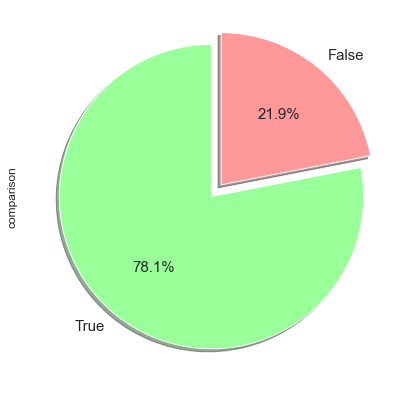

In [365]:
predf["comparison"].value_counts().plot.pie(figsize=(7,7),autopct='%1.1f%%',labels = {'True','False'},explode = (0, 0.1),shadow=True, startangle=90,textprops={'fontsize': 15},colors = ['#99ff99','#ff9999'] )

# Visualizations
Now let's see what our data can tell us - in visualization!

## 1. The top 20 popular artists

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Taylor Swift'),
  Text(1, 0, 'One Direction'),
  Text(2, 0, 'Beyoncé'),
  Text(3, 0, 'Rihanna'),
  Text(4, 0, 'Drake'),
  Text(5, 0, 'Ed Sheeran'),
  Text(6, 0, 'Kanye West'),
  Text(7, 0, 'Deep Sleep Music Collective'),
  Text(8, 0, 'Billie Eilish'),
  Text(9, 0, 'Juice WRLD'),
  Text(10, 0, 'Lorde'),
  Text(11, 0, 'J. Cole'),
  Text(12, 0, 'Bruno Mars'),
  Text(13, 0, 'Katy Perry'),
  Text(14, 0, 'The Weeknd'),
  Text(15, 0, 'Mac Miller'),
  Text(16, 0, 'Frank Ocean'),
  Text(17, 0, 'Adele'),
  Text(18, 0, 'John Mayer'),
  Text(19, 0, 'Justin Bieber')])

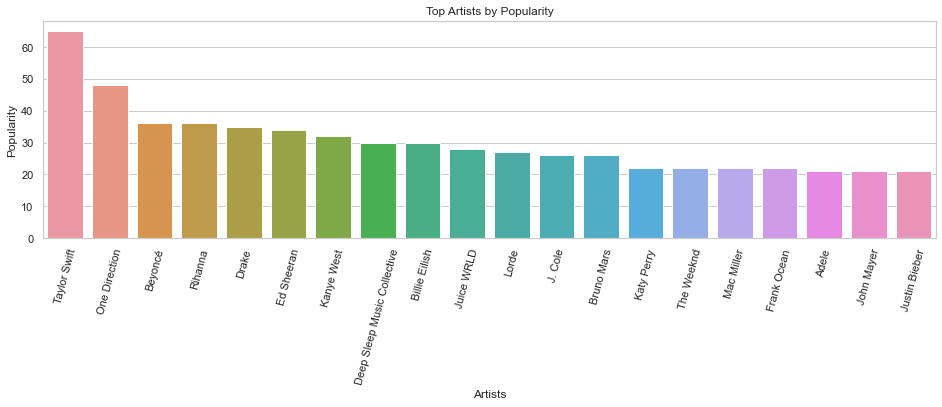

In [366]:
plt.figure(figsize=(16, 4))
sns.set(style="whitegrid")
x = df.groupby("Artist")["Popularity"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x=x.index, y=x)
ax.set_title('Top Artists by Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 75)

## 2. Top 5 popular key scales

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'C Major'),
  Text(1, 0, 'C# Major'),
  Text(2, 0, 'G Major'),
  Text(3, 0, 'D Major'),
  Text(4, 0, 'G# Major')])

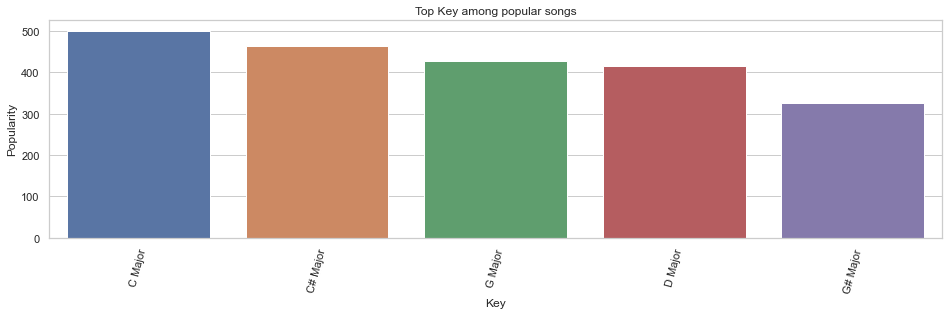

In [367]:
plt.figure(figsize=(16, 4))
sns.set(style="whitegrid")
x = df.groupby("Key")["Popularity"].sum().sort_values(ascending=False).head(5)
ax = sns.barplot(x=x.index, y=x)
ax.set_title('Top Key among popular songs')
ax.set_ylabel('Popularity')
ax.set_xlabel('Key')
plt.xticks(rotation = 75)

## 3. Songs distribution by Popularity

Text(0.5, 1.0, 'Songs Popularity Distribution')

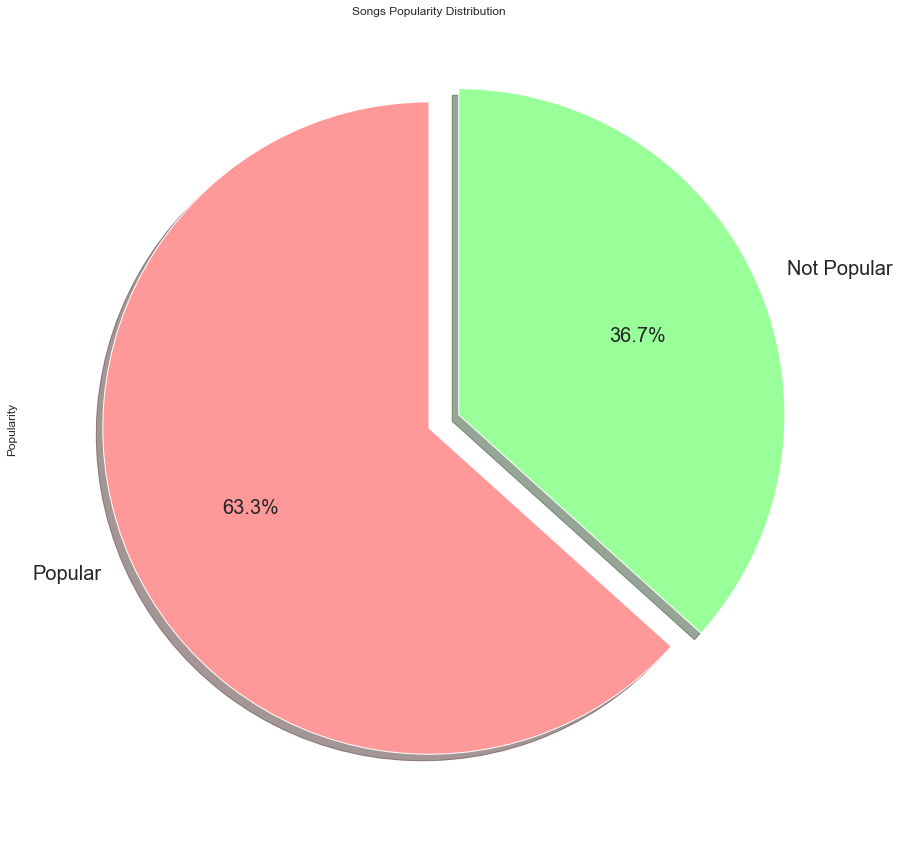

In [368]:
df['Popularity'].value_counts().plot.pie(figsize=(15,15),autopct='%1.1f%%',labels = {'Popular','Not Popular'},explode = (0, 0.1),shadow=True, startangle=90,textprops={'fontsize': 20},colors = ['#ff9999','#99ff99'] )
plt.title('Songs Popularity Distribution')

## 4. Key scales distribution of all songs

Text(0.5, 1.0, 'keys Distribution')

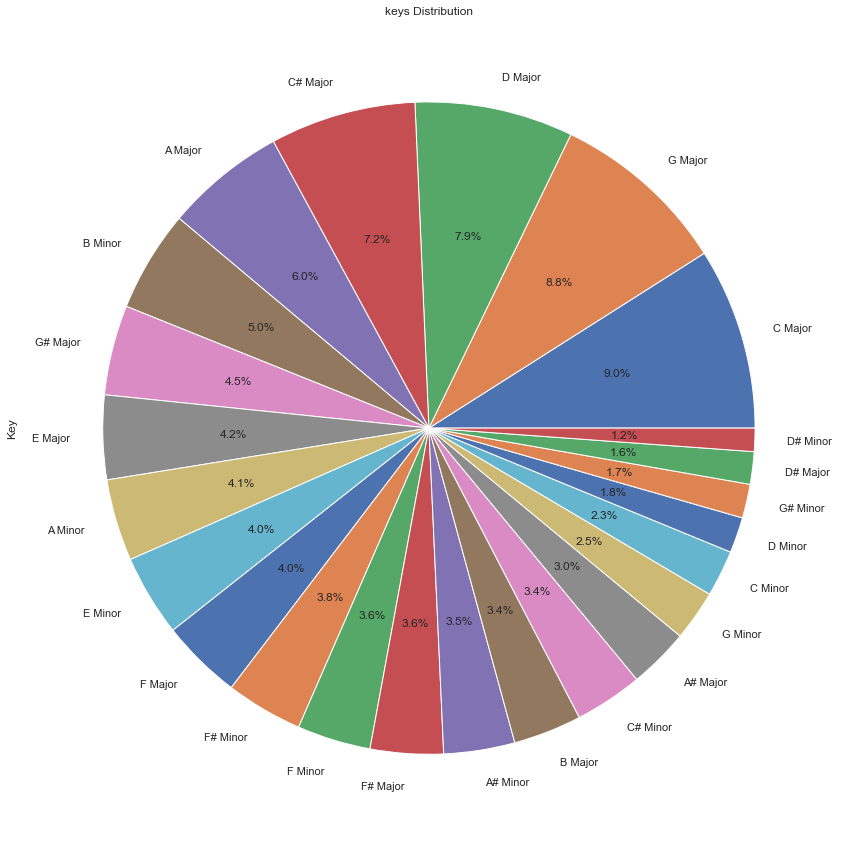

In [369]:
df['Key'].value_counts().plot.pie(figsize=(15,15),autopct='%1.1f%%')
plt.title('keys Distribution')

## 5. The 25 top artist with the most songs

Text(0, 0.5, 'Songs')

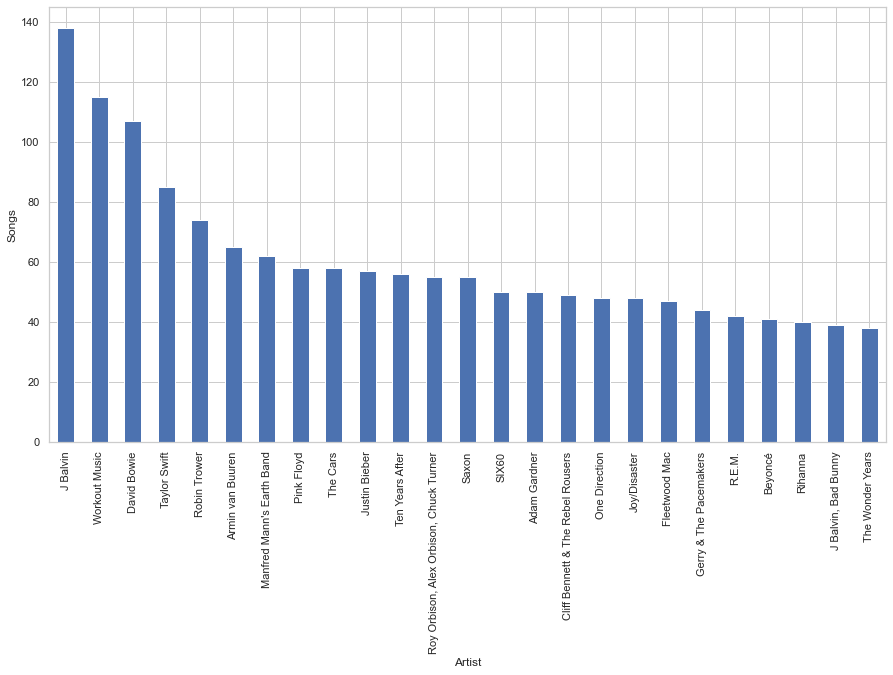

In [370]:
ax=df['Artist'].value_counts().head(25).plot.bar(figsize=(15,8))
ax.set_xlabel('Artist')
ax.set_ylabel('Songs')


## 6. (wow effect) All songs categorized by Recording locations

By using dataframe containing the countries location we presented the song recording locations.

another plot counts the number of songs recorded in particular location recording to the 'Country_Code' of each song.
###### 
In other words, we built a new dataframe containing our main dataframe and a given dataframe (from kaggle) which tells us exactly where to locate our songs.

The new dataframe contains the columns: Code, Count, Latitude, Longitude.

In [371]:
world_df = pd.read_csv('world_country_and_usa_states_latitude_and_longitude_values.csv')

Countries = pd.DataFrame({
    'Code': df["Country_Code"].unique(),
    'Count': df["Country_Code"].value_counts(),
    'Latitude':0.0 ,
    'Longitude':0.0
})

for lat,long,cd in zip(world_df["latitude"],world_df["longitude"],world_df["country_code"]):
    Countries.loc[Countries['Code']==cd,"Longitude"]=long
    Countries.loc[Countries['Code']==cd,"Latitude"]=lat
Countries.reset_index(inplace=True,drop=True)

In [372]:
Countries.head()

,Code,Count,Latitude,Longitude
0,US,6116,37.090240,-95.712891
1,GB,2617,55.378051,-3.435973
2,NZ,1674,-40.900557,174.885971
3,BE,560,50.503887,4.469936
4,JM,532,18.109581,-77.297508


In [373]:


fig = px.scatter_geo(Countries,
                    lat=Countries.Latitude,
                    lon=Countries.Longitude,
                    hover_name="Code",projection="natural earth",
                    size="Count",
                    color='Code')
fig.show()

fig = px.scatter_geo(Countries,
                    lat=Countries.Latitude,
                    lon=Countries.Longitude,
                    hover_name="Code",projection="natural earth",
                    color='Code')
fig.show()